In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Análise

In [ ]:
# esse método cat.codes é só pra fazer uma análise sem precisar usar label encoder

df['neighbourhood_group']= df['neighbourhood_group'].astype("category").cat.codes
df['neighbourhood'] = df['neighbourhood'].astype("category").cat.codes
df['room_type'] = df['room_type'].astype("category").cat.codes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

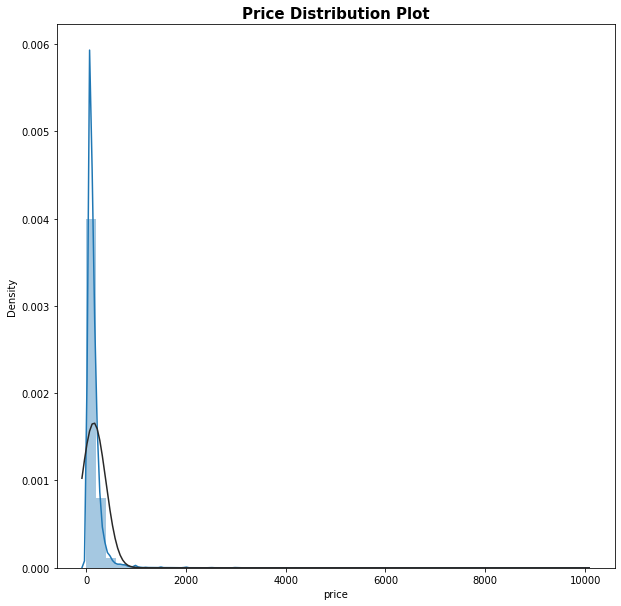

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [ ]:
df['price_log'] = np.log(df.price+1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

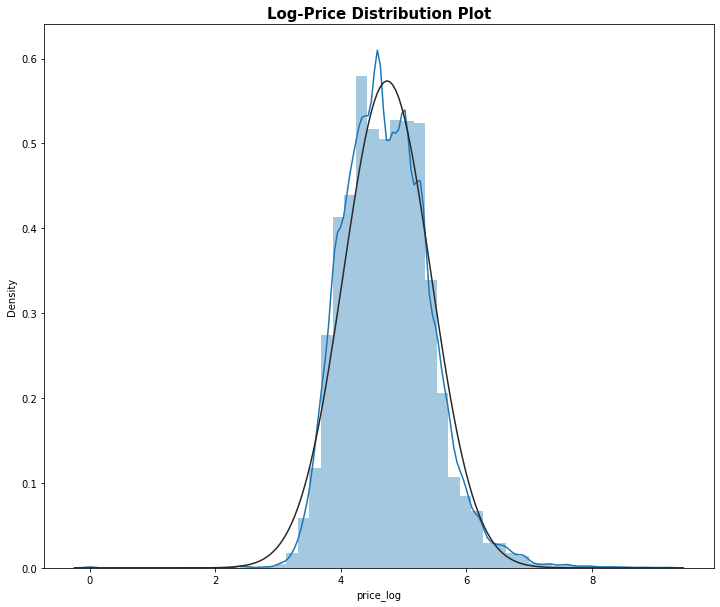

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

# Limpeza

In [ ]:
# tirando colunas que nao serão usadas
df = df.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])

In [ ]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_log                             0
dtype: int64

In [ ]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)

In [ ]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

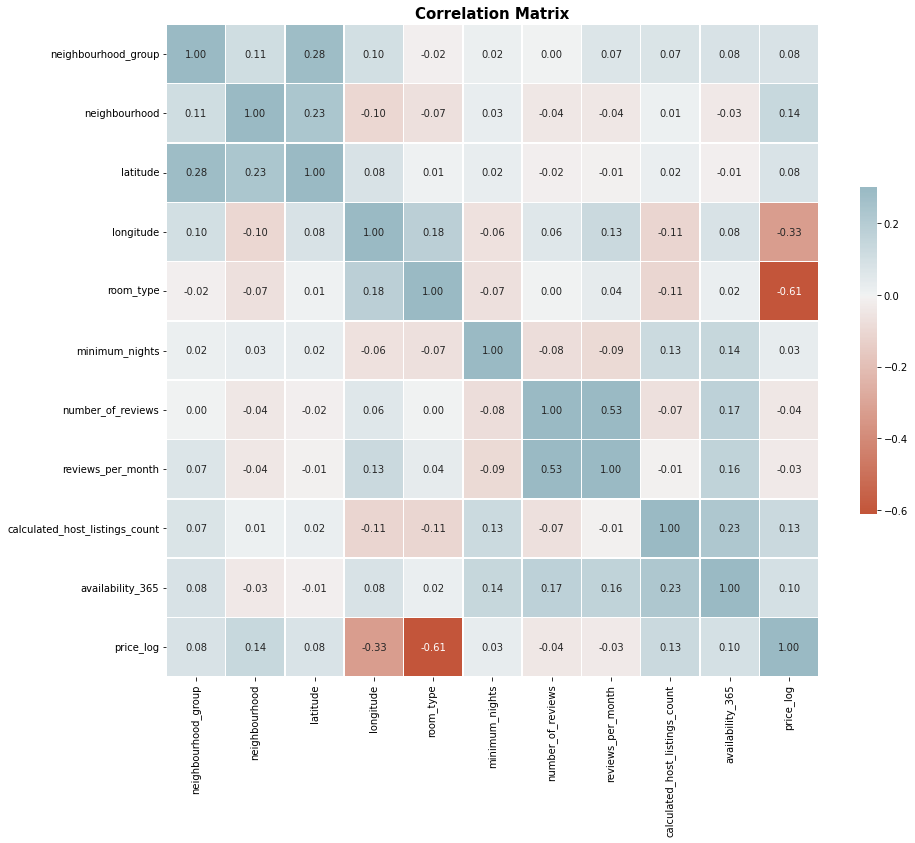

In [ ]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [ ]:
df_x = df.iloc[:,:-1]
df_x

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,1,9,0.210000,6,365
1,2,127,40.75362,-73.98377,0,1,45,0.380000,2,355
2,2,94,40.80902,-73.94190,1,3,0,1.373221,1,365
3,1,41,40.68514,-73.95976,0,1,270,4.640000,1,194
4,2,61,40.79851,-73.94399,0,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,1,2,0,1.373221,2,9
48891,1,28,40.70184,-73.93317,1,4,0,1.373221,2,36
48892,2,94,40.81475,-73.94867,0,10,0,1.373221,1,27
48893,2,95,40.75751,-73.99112,2,1,0,1.373221,6,2


In [ ]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,1,108,40.64749,-73.97237,1,1,9,0.210000,6,365,5.010635
1,2,127,40.75362,-73.98377,0,1,45,0.380000,2,355,5.420535
2,2,94,40.80902,-73.94190,1,3,0,1.373221,1,365,5.017280
3,1,41,40.68514,-73.95976,0,1,270,4.640000,1,194,4.499810
4,2,61,40.79851,-73.94399,0,10,9,0.100000,1,0,4.394449
...,...,...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,1,2,0,1.373221,2,9,4.262680
48891,1,28,40.70184,-73.93317,1,4,0,1.373221,2,36,3.713572
48892,2,94,40.81475,-73.94867,0,10,0,1.373221,1,27,4.753590
48893,2,95,40.75751,-73.99112,2,1,0,1.373221,6,2,4.025352


In [ ]:
df_y = df.iloc[:,-1]
df_y

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
48890    4.262680
48891    3.713572
48892    4.753590
48893    4.025352
48894    4.510860
Name: price_log, Length: 48895, dtype: float64

# Normalização e Divisão

In [ ]:
# normalização

scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)

In [ ]:
# divisão

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

In [ ]:
# essa etapa aqui é pra mostrar que o neighborhood group e room type são irrelevantes, mas tá dando erro de RAM

"""
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=df.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
"""

"\nlab_enc = preprocessing.LabelEncoder()\n\nfeature_model = ExtraTreesClassifier(n_estimators=50)\nfeature_model.fit(X_train,lab_enc.fit_transform(y_train))\n\nplt.figure(figsize=(7,7))\nfeat_importances = pd.Series(feature_model.feature_importances_, index=df.iloc[:,:-1].columns)\nfeat_importances.nlargest(10).plot(kind='barh')\nplt.show()\n"

#Treino Regressão Simples

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics 

regressao = LinearRegression()
reg = regressao.fit(X_train,y_train)

# Treino - k Fold = 5

In [ ]:
### K-Fold Cross Validation ###

kfold_cv = KFold(n_splits=5)
for train_index, test_index in kfold_cv.split(df_x,df_y):
    print("Train:", train_index, "Validation:", test_index)
    X_train, X_test = df_x[train_index], df_x[test_index]
    y_train, y_test = df_y[train_index], df_y[test_index]

Train: [ 9779  9780  9781 ... 48892 48893 48894] Validation: [   0    1    2 ... 9776 9777 9778]
Train: [    0     1     2 ... 48892 48893 48894] Validation: [ 9779  9780  9781 ... 19555 19556 19557]
Train: [    0     1     2 ... 48892 48893 48894] Validation: [19558 19559 19560 ... 29334 29335 29336]
Train: [    0     1     2 ... 48892 48893 48894] Validation: [29337 29338 29339 ... 39113 39114 39115]
Train: [    0     1     2 ... 39113 39114 39115] Validation: [39116 39117 39118 ... 48892 48893 48894]


In [ ]:
X_train[0]

array([-0.91782758,  0.01276167, -1.4938492 , -0.43765209,  0.90935915,
       -0.29399621, -0.32041358, -0.77664098, -0.03471643,  1.91625031])

# Previsão

In [ ]:
##Linear Regression with k-fold
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

In [ ]:
lr.coef_

array([ 0.03799279,  0.03994073,  0.04824233, -0.16497375, -0.38583378,
       -0.02875432, -0.04051471,  0.02104941,  0.01626603,  0.08801945])

In [ ]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': lr_pred.flatten()})
diff = np.array(y_test).flatten() - lr_pred.flatten()
error_airbnb['Margin of Error'] = diff
erro_dol = np.exp(error_airbnb['Margin of Error'])
erro_dol

0       2.793422
1       2.357045
2       1.265498
3       0.506146
4       3.305514
          ...   
9774    1.069878
9775    0.627396
9776    0.694908
9777    1.249427
9778    0.998185
Name: Margin of Error, Length: 9779, dtype: float64

Text(0, 0.5, 'rmse')

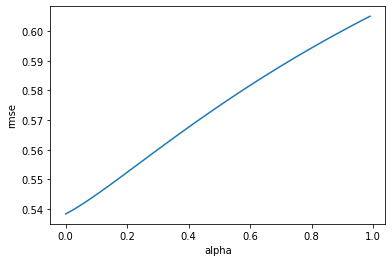

In [ ]:
#Estimando o melhor lambda para o Ridge Model

alphas = np.arange(0, 1, 0.01)
pred_ridge_aux = []
alpha_aux = []
for alpha in alphas : 
  ridge_model = Ridge(alpha = alpha, normalize = True)
  ridge_model.fit(X_train, y_train)             
  pred_ridge = ridge_model.predict(X_test) 
  rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test,pred_ridge)) 
  pred_ridge_aux.append(rmse_ridge)
  alpha_aux.append(alpha)

 #if(pred_ridge_aux >= rmse_ridge):
 #   alpha_aux = alpha
 #  pred_ridge_aux = rmse_ridge
  
plt.plot(alpha_aux,pred_ridge_aux)
plt.xlabel('alpha')
plt.ylabel('rmse')

In [ ]:
from sklearn.linear_model import RidgeCV

clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
clf.score(X, y)
0.5166...

In [ ]:
#Ridge Model
# ANTIGO ridge_model = Ridge(alpha = 0.01, normalize = True)
ridge_model = Ridge(alpha = 0, normalize = True)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

In [ ]:
#Estimando o melhor lambda para o Lasso Model
alphas = np.arange(0, 1.0, 0.01)
pred_lasso_aux = 1
alpha_aux = 0
for alpha in alphas : 
  lasso_model = Lasso(alpha = alpha, normalize = True)
  lasso_model.fit(X_train, y_train)             
  pred_lasso = lasso_model.predict(X_test) 
  rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test,pred_lasso)) 
  if(pred_lasso_aux >= rmse_lasso):
    alpha_aux = alpha
    pred_lasso_aux = rmse_lasso

print('RMSE: %.3f' % pred_lasso_aux)
print('Config: %s' % alpha_aux)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4991.0234793407135, tolerance: 1.796406823859697
  positive)


RMSE: 0.538
Config: 0.0


In [ ]:
#Lasso Model
Lasso_model = Lasso(alpha = 0.001, normalize =False)
#Lasso_model = Lasso(alpha = 0, normalize =False)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test) 


In [ ]:
#Estimando o melhor lambda para o ElasticNet Model
alphas = np.arange(0, 1.0, 0.01)
pred_ElasticNet_aux = 1
alpha_aux = 0
for alpha in alphas : 
  ElasticNet_model = ElasticNet(alpha = alpha, normalize = True)
  ElasticNet_model.fit(X_train, y_train)             
  pred_ElasticNet = ElasticNet_model.predict(X_test) 
  rmse_ElasticNet = np.sqrt(metrics.mean_squared_error(y_test,pred_ElasticNet)) 
  if(pred_ElasticNet_aux >= rmse_ElasticNet):
    alpha_aux = alpha
    pred_ElasticNet_aux = rmse_ElasticNet

print('RMSE: %.3f' % pred_ElasticNet_aux)
print('Config: %s' % alpha_aux)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4991.0234793407135, tolerance: 1.796406823859697
  positive)


RMSE: 0.538
Config: 0.0


In [ ]:
#ElasticNet Model
# ANTIGO model_enet = ElasticNet(alpha = 0.01, normalize=False)
model_enet = ElasticNet(alpha = 0, normalize=False)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4991.02347934071, tolerance: 1.796406823859697
  positive)


Linear regression without k-fold

In [ ]:
Y_pred_regressao = reg.predict(X_test)
print('------------- Linear Regression Simple -----------')

print('MAE: %f'% mean_absolute_error(y_test, Y_pred_regressao))
print('RMSE: %f'% np.sqrt(metrics.mean_squared_error(y_test,Y_pred_regressao)))   
print('R2 %f' % r2_score(y_test, Y_pred_regressao))

------------- Linear Regression Simple -----------
MAE: 0.389978
RMSE: 0.536052
R2 0.501930


In [ ]:
print('------------- Linear Regression Fold = 5 -----------')

print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

------------- Linear Regression Fold = 5 -----------
MAE: 0.391340
RMSE: 0.538368
R2 0.497618


In [ ]:
print('--------------- Ridge Fold = 5 ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))

--------------- Ridge Fold = 5 ---------------------
MAE: 0.391340
RMSE: 0.538368
R2 0.497618


In [ ]:
print('--------------- Lasso Fold = 5 ---------------------')

print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))

--------------- Lasso Fold = 5 ---------------------
MAE: 0.391340
RMSE: 0.538368
R2 0.497618


In [ ]:
print('--------------- ElasticNet Fold = 5 -------------------')

print('MAE: %f' % mean_absolute_error(y_test,pred_test_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_enet))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_enet))

--------------- ElasticNet Fold = 5 -------------------
MAE: 0.391340
RMSE: 0.538368
R2 0.497618


# Gráfico dos Resultados

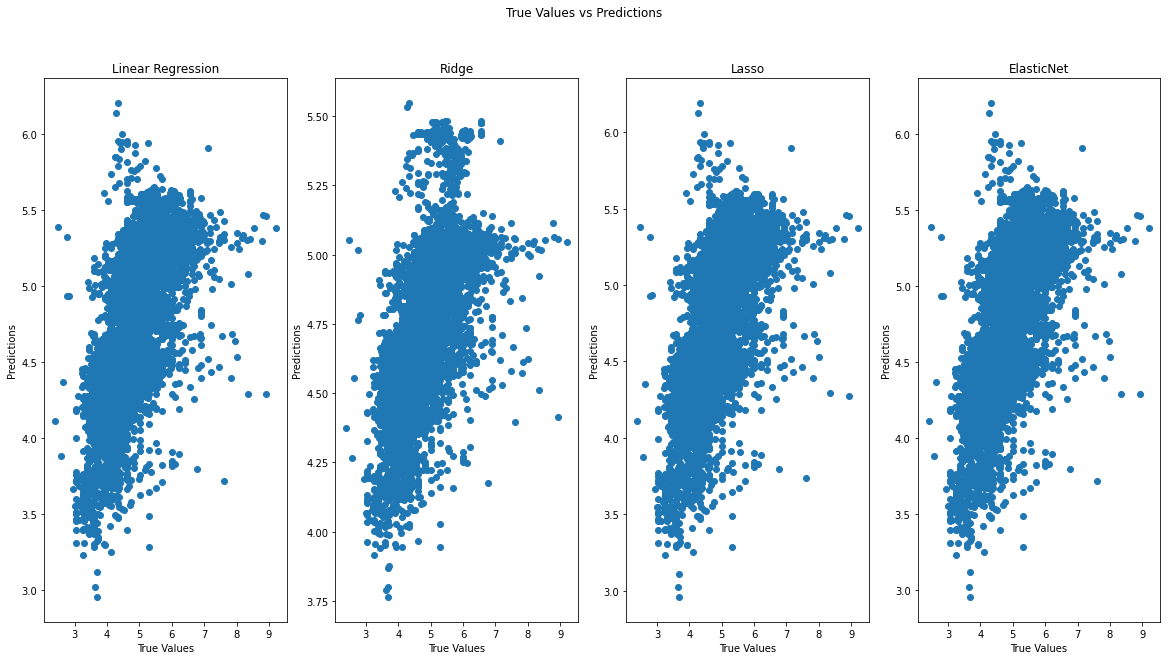

In [ ]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(20, 10))
fig.suptitle('True Values vs Predictions')

ax1.scatter(y_test, lr_pred)
ax1.set_title('Linear Regression')

ax2.scatter(y_test, pred_ridge)
ax2.set_title('Ridge')

ax3.scatter(y_test, pred_Lasso)
ax3.set_title('Lasso')

ax4.scatter(y_test, pred_test_enet)
ax4.set_title('ElasticNet')

for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')

# Comparação dos Resultados

------------- Linear Regression Simple -----------

MAE: 0.398883

RMSE: 0.547897

R2 0.494697

------------- Linear Regression Fold = 5 -----------

MAE: 0.391340

RMSE: 0.538368

R2 0.497618

------------- Linear Regression Fold = 10 -----------

MAE: 0.399998

RMSE: 0.550990

R2 0.488976





#################################

--------------- Ridge Fold = 5 ---------------------

MAE: 0.391743

RMSE: 0.538921

R2 0.496584

--------------- Ridge Fold = 10 ---------------------

MAE: 0.400650

RMSE: 0.551755

R2 0.487556

#################################

--------------- Lasso Fold = 5 ---------------------

MAE: 0.390916

RMSE: 0.538550

R2 0.497277

--------------- Lasso Fold = 10 ---------------------

MAE: 0.400138

RMSE: 0.551495

R2 0.488039

#1 
Use the transformed predictors in the training set to learn an ordinary linear regression model and test the model using the test set (remember to apply the same
pre-processing you used on the training set). Compare the model performance obtained on the test set with the estimates you would obtain using a resampling scheme
as 5- or 10-fold cross validation: use both the RMSE and R2


Resultados: 

------------- Linear Regression Simple -----------

MAE: 0.389978

RMSE: 0.536052

R2 0.501930

------------- Linear Regression Fold = 5 -----------

MAE: 0.391340

RMSE: 0.538368

R2 0.497618


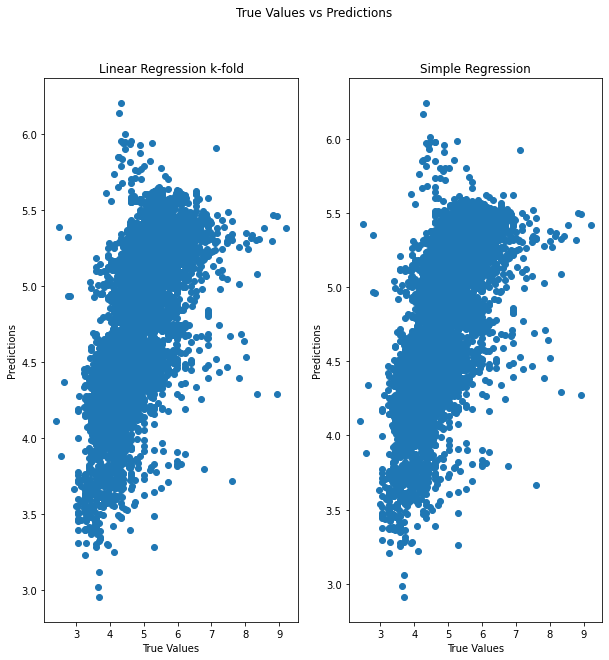

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 10))
fig.suptitle('True Values vs Predictions')

ax1.scatter(y_test, lr_pred)
ax1.set_title('Linear Regression k-fold')

ax2.scatter(y_test, Y_pred_regressao)
ax2.set_title('Simple Regression')


for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')

#2 
Use the transformed predictors in the training set to learn the penalised linear regression model that you believe being more adequate (justify/comment on your choice). Test the model using the test set (remember to apply the same pre-processing you used on the training set). Determine the optimal value of the penalising parameter  using a 5- or 10-fold cross-validation based on the RMSE (you can only use the training set in this phase, and your search space  should consist of at least 10 values). Report on process (show the cross-validation profile, both on terms of the RMSE and R2). Report the accuracy (RMSE and R2) obtained on the test set.

Resultados: 

############################

**5- fold**

############################

Ridge:

MAE: 0.391743
RMSE: 0.538921
R2 0.496584

Lasso:

MAE: 0.390916
RMSE: 0.538550
R2 0.497277

ElasticNet:

MAE: 0.390361
RMSE: 0.540712
R2 0.493233

############################


#3
 Use the transformed predictors in the training set to learn either a PLS or a PCR regression model (justify/comment on your choice). Test the model using the test set (remember to apply the same pre-processing you used on the training set). Determine the optimal number of components using a 5- or 10-fold cross-validation based on the RMSE (you can only use the training set in this phase). Report on process (show the cross-validation profile, both in terms of the RMSE and R2). Report the accuracy (RMSE and R2) obtained on the test set.

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

NameError: ignored

In [ ]:
### K-Fold Cross Validation ###

kfold_cv=KFold(n_splits = 5)
for train_index, test_index in kfold_cv.split(df_x,df_y):
    X_train, X_test = df_x[train_index], df_x[test_index]
    y_train, y_test = df_y[train_index], df_y[test_index]

In [ ]:
# Define PLS object
pls = PLSRegression(n_components = 5)
 
# Fit
pls.fit(X_train, y_train)
 
# Cross-validation
y_cv = cross_val_predict(pls, X_test, y_test, cv=kfold_cv)
 
# Calculate scores
score = r2_score(y_test, y_cv)
mse = mean_squared_error(y_test, y_cv)
rmse = sqrt(mse)

In [ ]:
print(f"R2: {score}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

In [ ]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
 
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
 
    # Fir to the entire dataset
    pls_opt.fit(X_train, y_train)
    y_c = pls_opt.predict(X_test)
 
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X_test, y_test, cv= kfold_cv)
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y_test, y_c)
    score_cv = r2_score(y_test, y_cv)
 
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y_test, y_c)
    mse_cv = mean_squared_error(y_test, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
 
    # Plot regression and figures of merit
    rangey = max(y_test) - min(y_test)
    rangex = max(y_c) - min(y_c)
 
    # Fit a line to the CV vs response
    z = np.polyfit(y_test, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y_test, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y_test, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y_test, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
 
        plt.show()
 
    return

In [ ]:
optimise_pls_cv(X2,y, 40, plot_components=True)